In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### DATA

In [3]:
od.download(
    "https://www.kaggle.com/datasets/arshid/iris-flower-dataset")

Skipping, found downloaded files in ".\iris-flower-dataset" (use force=True to force download)


In [36]:
file = ('iris-flower-dataset/IRIS.csv')
df = pd.read_csv(file)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [38]:
# Missing Values/Null Values Count
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### EDA

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Handle infinite values explicitly
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
columns = df.columns.tolist

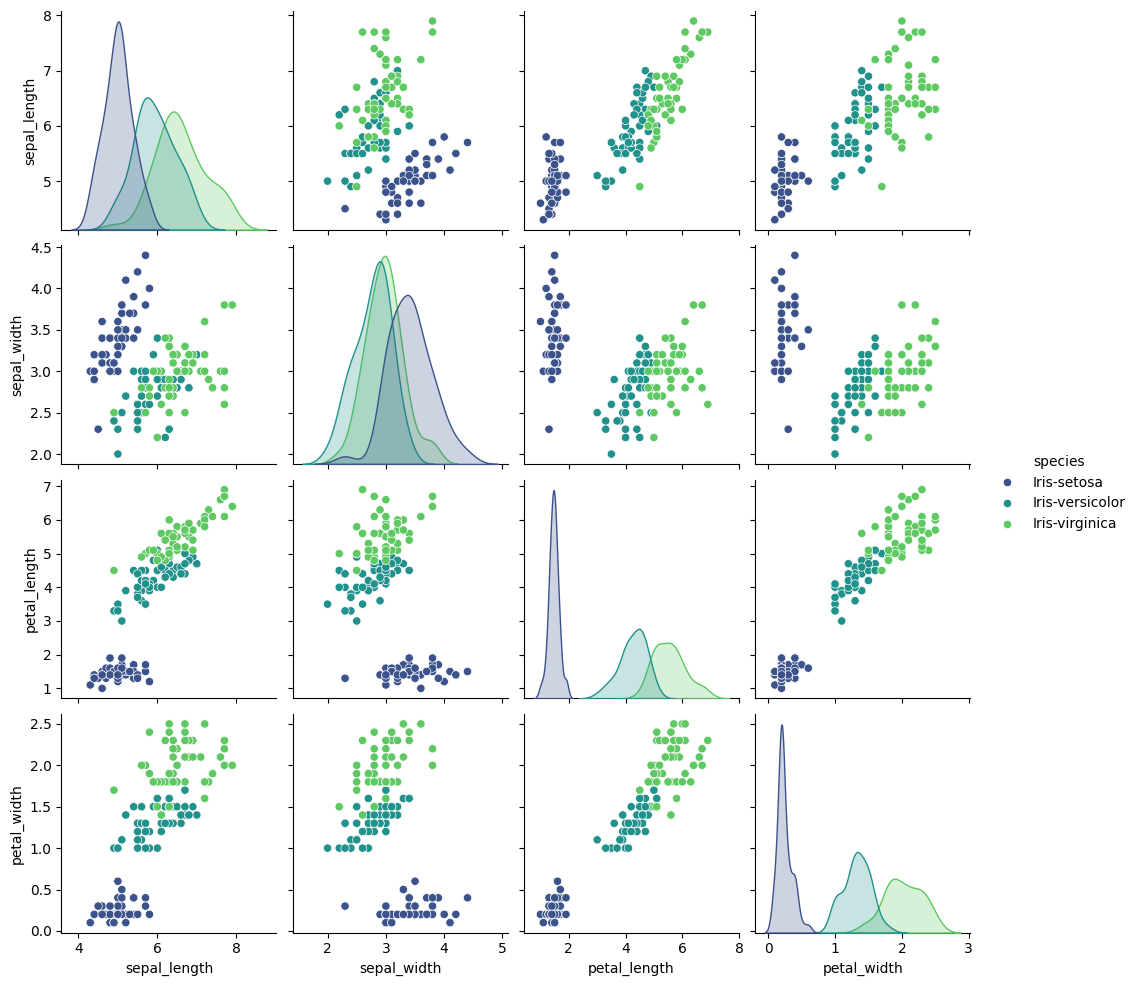

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

In [10]:
df[["flower","specie"]] = df["species"].str.split('-', expand=True)

df.drop(columns=["species","flower"], inplace=True)

df.rename(columns={"specie": "species"}, inplace=True)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


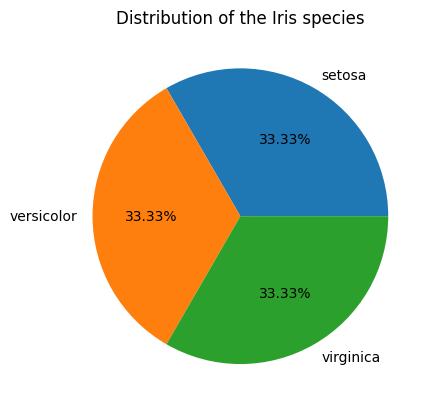

In [11]:
mylabels = df["species"].unique()
v = [50,50,50]

plt.pie(v, labels = mylabels, autopct = "%.2f%%")
plt.title("Distribution of the Iris species")
plt.show()

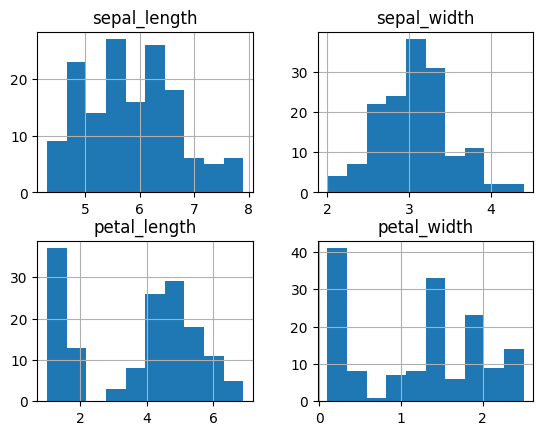

In [12]:
df.hist();

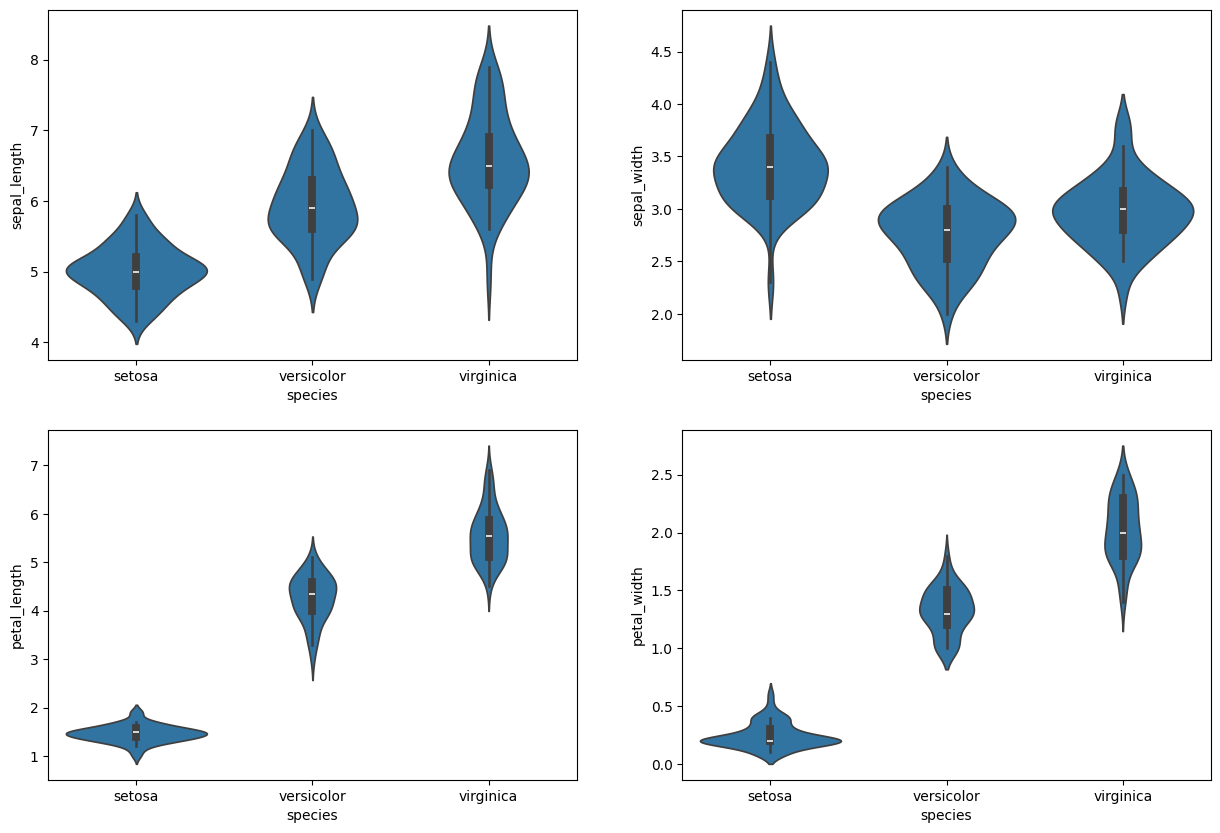

In [13]:
plt.figure(figsize=(15,10))
i=1
for a in df.columns[:4]:
    plt.subplot(2,2,i)
    sns.violinplot(x='species', y=a, data=df)
    i+=1

In [ ]:
# label encoding
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

### Models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [16]:
X = df.drop(columns='species')
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [26]:
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Classifier SVC' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(criterion='entropy',random_state=7),
    'Gaussian NV' : GaussianNB()
}

model_accuracies = {}

for k,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_accuracies[k] = accuracy_score(y_test, y_pred)
    print(f"{k} accuracy {model_accuracies[k]}")

Random Forest accuracy 1.0
K-Nearest Neighbors accuracy 1.0
Logistic Regression accuracy 1.0
Support Vector Classifier SVC accuracy 0.9666666666666667
Decision Tree accuracy 0.9333333333333333
Gaussian NV accuracy 1.0


In [27]:
print(model_accuracies)

{'Random Forest': 1.0, 'K-Nearest Neighbors': 1.0, 'Logistic Regression': 1.0, 'Support Vector Classifier SVC': 0.9666666666666667, 'Decision Tree': 0.9333333333333333, 'Gaussian NV': 1.0}


C:\Users\DELL\AppData\Local\Temp\ipykernel_16172\154530301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


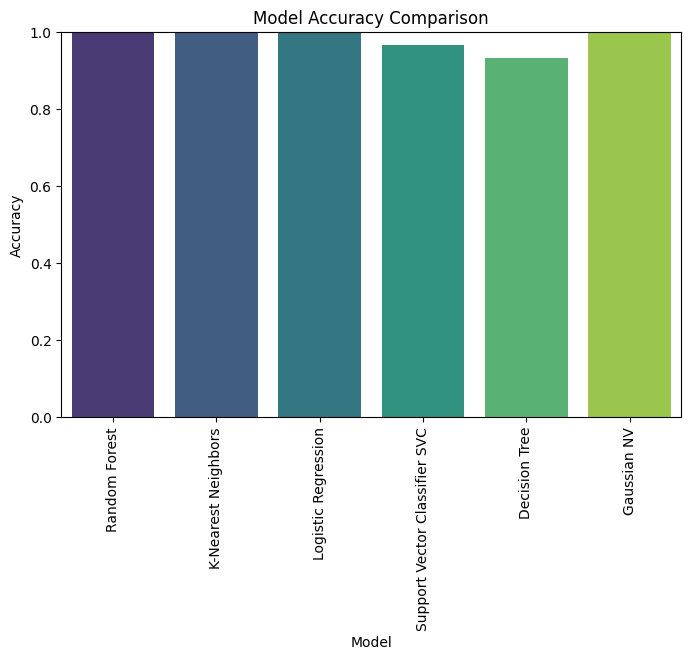

In [34]:
# Plot accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation = 90)
plt.ylim(0, 1)
plt.show();